In [1]:
from vega_datasets import data
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# get data
df = data.sf_temps()
df.head()

,temp,date
0,47.8,2010-01-01 00:00:00
1,47.4,2010-01-01 01:00:00
2,46.9,2010-01-01 02:00:00
3,46.5,2010-01-01 03:00:00
4,46.0,2010-01-01 04:00:00


In [3]:
df.dtypes

temp           float64
date    datetime64[ns]
dtype: object

In [4]:
# set the index to date
df = df.set_index("date")
df.head()

,temp
date,
2010-01-01 00:00:00,47.8
2010-01-01 01:00:00,47.4
2010-01-01 02:00:00,46.9
2010-01-01 03:00:00,46.5
2010-01-01 04:00:00,46.0


**Resample by the day and take the average temperature. Visualize the average temperature over time.**

In [5]:
resample_by_day = df.resample("d").mean().sort_index()
resample_by_day.head(2)

,temp
date,
2010-01-01,49.170833
2010-01-02,49.304167


Text(0.5, 1.0, 'Average daily temperature over time')

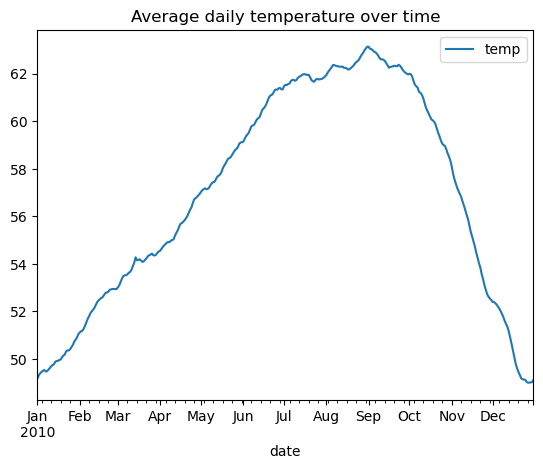

In [6]:
resample_by_day.plot(kind="line")
plt.title("Average daily temperature over time")

**Write the code necessary to visualize the minimum temperature over time.**

In [7]:
resample_by_min_day = df.resample("d").min().sort_index()
resample_by_day.head(2)

,temp
date,
2010-01-01,49.170833
2010-01-02,49.304167


Text(0.5, 1.0, 'Minimum temperature over time')

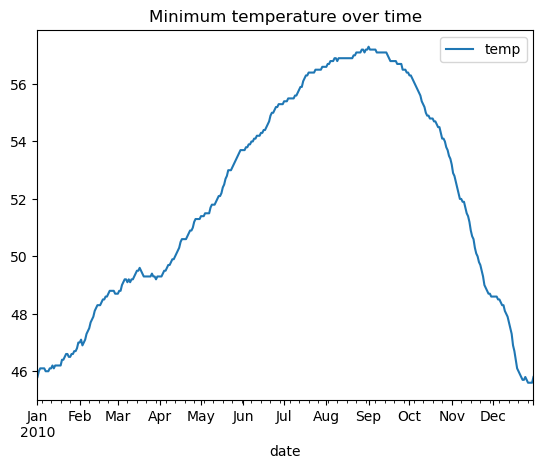

In [8]:
resample_by_min_day.plot(kind="line")
plt.title("Minimum temperature over time")

**Write the code necessary to visualize the maximum temperature over time.**

In [9]:
resample_by_max_day = df.resample("d").max().sort_index()
resample_by_day.head(2)

,temp
date,
2010-01-01,49.170833
2010-01-02,49.304167


Text(0.5, 1.0, 'Maximum temperature over time')

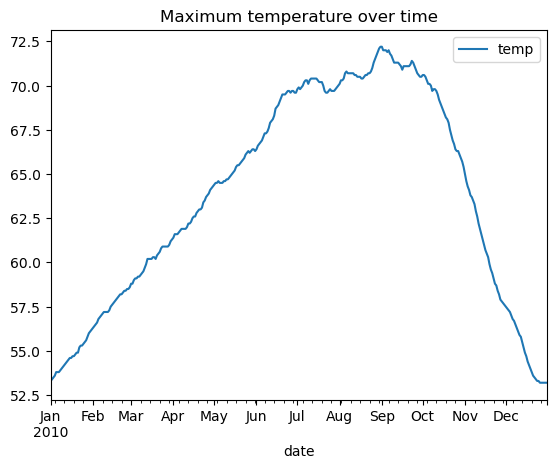

In [10]:
resample_by_max_day.plot(kind="line")
plt.title("Maximum temperature over time")

**Which month is the coldest, on average?**

In [11]:
# df["month_name"] = df.index.strftime("%B")
df["month"] = df.index.month
df.head(2)

,temp,month
date,,
2010-01-01 00:00:00,47.8,1
2010-01-01 01:00:00,47.4,1


In [26]:
# df.month[df.resample("M").temp.mean() == df.resample("M").temp.mean().max()]

mean_by_month = df.resample("M").mean()

mean_by_month[mean_by_month.temp == mean_by_month.temp.min()]

,temp,month
date,,
2010-01-31,49.98414,1.0


**Which month has the highest average temperature?**

In [27]:
# df.month[df.resample("M").temp.mean() == df.resample("M").temp.mean().max()]

max_by_month = df.resample("M").mean()

max_by_month[max_by_month.temp == max_by_month.temp.max()]

,temp,month
date,,
2010-09-30,62.487083,9.0


**Resample by the day and calculate the min and max temp for the day (Hint: .agg(['min', 'max'])). Use this resampled dataframe to calculate the change in temperature for the day. Which month has the highest daily temperature variability?**

In [32]:
min_max = df.resample("D").temp.agg(["mean", "max"])
min_max.head(3)

,mean,max
date,,
2010-01-01,49.170833,53.3
2010-01-02,49.304167,53.4
2010-01-03,49.391667,53.5


In [40]:
min_max.diff().max()

mean    0.232065
max     0.400000
dtype: float64

### part 2

In [42]:
weather = data.seattle_weather()
weather.head()

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain


In [46]:
weather.dtypes

date             datetime64[ns]
precipitation           float64
temp_max                float64
temp_min                float64
wind                    float64
weather                  object
dtype: object

In [50]:
weather = weather.set_index("date")

**Which year and month combination has the highest amount of precipitation?**

In [66]:
month_year_max = weather.resample("m").precipitation.max()

month_year_max[month_year_max == month_year_max.max()]

date
2015-03-31    55.9
Freq: M, Name: precipitation, dtype: float64

**Visualize the amount of monthly precipitation over time.**

<Axes: xlabel='date'>

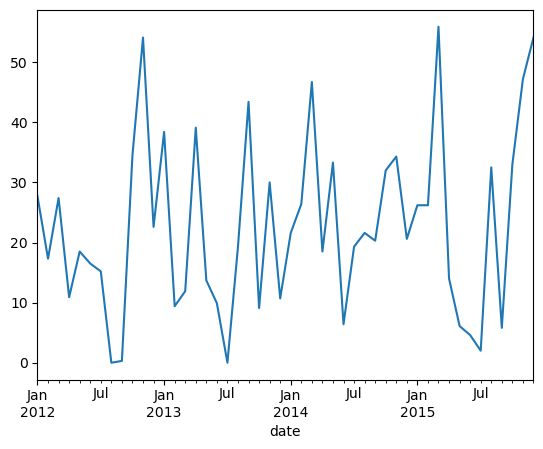

In [67]:
month_year_max.plot()

**Visualize the amount of wind over time. Choose a time interval you think is appropriate.**

In [70]:
month_year_mun_wind = weather.resample("m").wind.mean()
month_year_mun_wind.head()

date
2012-01-31    3.900000
2012-02-29    3.903448
2012-03-31    4.248387
2012-04-30    3.373333
2012-05-31    3.354839
Freq: M, Name: wind, dtype: float64

<Axes: xlabel='date'>

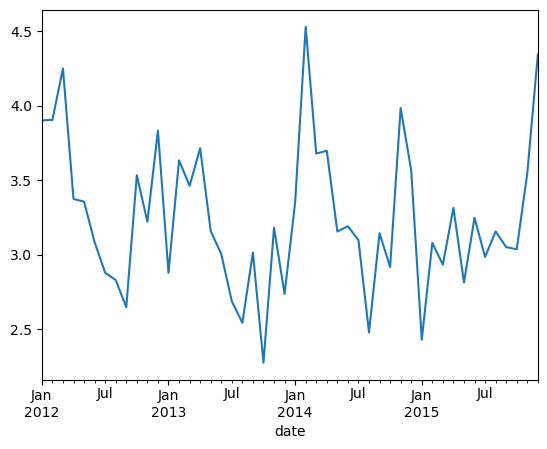

In [71]:
month_year_mun_wind.plot()

**Which year-month combination is the windiest?**

In [72]:
month_year_mun_wind[month_year_mun_wind == month_year_mun_wind.max()]

date
2014-02-28    4.528571
Freq: M, Name: wind, dtype: float64

**What's the sunniest year? (Hint: which day has the highest number of days where weather == sun?)**

In [102]:
sun_days = weather[weather["weather"] == "sun"]

sun_days.resample("y").count().idxmax()['weather'].year

2014

**In which month does it rain the most?**

In [126]:
weather["month"] = weather.index.month

In [127]:
rain_days = weather[weather["weather"] == "rain"]

rain_days.resample("y").count().idxmax()['weather'].year

2012

**Which month has the most number of days with a non-zero amount of precipitation?**

In [130]:
month_precip = weather[weather["precipitation"] != 0]

month_precip.resample("m").count().idxmax()["month"].month


12

### Part 3

In [131]:
flight = data.flights_20k()
flight.head()

,date,delay,distance,origin,destination
0,2001-01-13 14:56:00,32,417,SAN,SJC
1,2001-01-31 16:40:00,-5,1093,FLL,ISP
2,2001-02-11 18:39:00,3,293,LBB,DAL
3,2001-01-10 21:00:00,-15,550,MSY,MCO
4,2001-03-30 21:45:00,-2,229,STL,IND


In [132]:
flight.dtypes

date           datetime64[ns]
delay                   int64
distance                int64
origin                 object
destination            object
dtype: object

Convert any negative delays to 0.

In [141]:
flight.delay = flight.delay.clip(lower=0)

Which hour of the day has the highest average delay?

In [157]:
flight.resample("h", on="date").delay.mean().idxmax().hour

3

Does the day of the week make a difference in the delay amount?

In [164]:
flight.resample("D", on="date").delay.mean().idxmax().hour

0

Does the month make a difference in the delay amount?

In [167]:
flight.resample("M", on="date").delay.mean().idxmax().hour

0